In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
X = df.drop('sales',axis=1)
y = df['sales']

###### Polynomial Regression

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
poly_conv = PolynomialFeatures(degree=3, include_bias=False)

In [6]:
#poly_conv.fit(X)

In [7]:
#poly_conv.transform(X)

In [8]:
poly_features = poly_conv.fit_transform(X)
poly_features

array([[2.30100000e+02, 3.78000000e+01, 6.92000000e+01, ...,
        9.88757280e+04, 1.81010592e+05, 3.31373888e+05],
       [4.45000000e+01, 3.93000000e+01, 4.51000000e+01, ...,
        6.96564990e+04, 7.99365930e+04, 9.17338510e+04],
       [1.72000000e+01, 4.59000000e+01, 6.93000000e+01, ...,
        1.46001933e+05, 2.20434291e+05, 3.32812557e+05],
       ...,
       [1.77000000e+02, 9.30000000e+00, 6.40000000e+00, ...,
        5.53536000e+02, 3.80928000e+02, 2.62144000e+02],
       [2.83600000e+02, 4.20000000e+01, 6.62000000e+01, ...,
        1.16776800e+05, 1.84062480e+05, 2.90117528e+05],
       [2.32100000e+02, 8.60000000e+00, 8.70000000e+00, ...,
        6.43452000e+02, 6.50934000e+02, 6.58503000e+02]])

In [9]:
poly_features.shape

(200, 19)

In [10]:
X.iloc[2]

TV           17.2
radio        45.9
newspaper    69.3
Name: 2, dtype: float64

In [11]:
poly_features[2]

array([1.72000000e+01, 4.59000000e+01, 6.93000000e+01, 2.95840000e+02,
       7.89480000e+02, 1.19196000e+03, 2.10681000e+03, 3.18087000e+03,
       4.80249000e+03, 5.08844800e+03, 1.35790560e+04, 2.05017120e+04,
       3.62371320e+04, 5.47109640e+04, 8.26028280e+04, 9.67025790e+04,
       1.46001933e+05, 2.20434291e+05, 3.32812557e+05])

In [12]:
17.2**2

295.84

In [13]:
45.9**2

2106.81

In [14]:
69.3**2

4802.49

In [15]:
17.2*45.9

789.4799999999999

In [16]:
45.9*69.3

3180.87

In [17]:
17.2*69.3

1191.9599999999998

### Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(poly_features,y,test_size=0.3,random_state=100)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
poly_mod = LinearRegression()

In [22]:
poly_mod.fit(X_train,y_train)

LinearRegression()

###### Evaluating the performance on Test Set

In [23]:
test_pred = poly_mod.predict(X_test)
len(test_pred)

60

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
MAE = mean_absolute_error(y_test,test_pred)
MAE

0.3408728001796959

In [26]:
MSE = mean_squared_error(y_test,test_pred)
RMSE = np.sqrt(MSE)

In [27]:
MSE

0.20797287964136021

In [28]:
RMSE

0.45604043641036945

In [29]:
df['sales'].mean()

14.0225

###### Choose a Model Complexity (Degree of Polynomial)

In [30]:
#Training error per degree
train_rmse_errors = []
#Test error per degree
test_rmse_errors = []

for degree1 in range(1,10):
    
    #Create poly dataset for degree 'd'
    poly_converter = PolynomialFeatures(degree = degree1, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    #split the train test data
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y , test_size=1/3, random_state=100)
    
    #train on the new poly set
    poly_mod = LinearRegression(fit_intercept=True)
    poly_mod.fit(X_train,y_train)
    
    #predict on both train and test set
    train_pred = poly_mod.predict(X_train)
    test_pred = poly_mod.predict(X_test)
    
    #calculate errors on both train and test test
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
    
    #append erros to lists for plotting
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [31]:
train_rmse_errors

[1.8077575145528808,
 0.6782071657947524,
 0.48547060154972765,
 0.37285967702213535,
 0.24231311256930807,
 0.24413689857000906,
 1.155287831649526,
 0.13456710952239856,
 0.08979376026513053]

In [32]:
test_rmse_errors

[1.4112010370543995,
 0.45748893192832796,
 0.49807976383124647,
 0.4395694831978612,
 0.4588055795457938,
 0.9377010248307023,
 14.37749397099107,
 567.5665897760032,
 6784.198110352805]

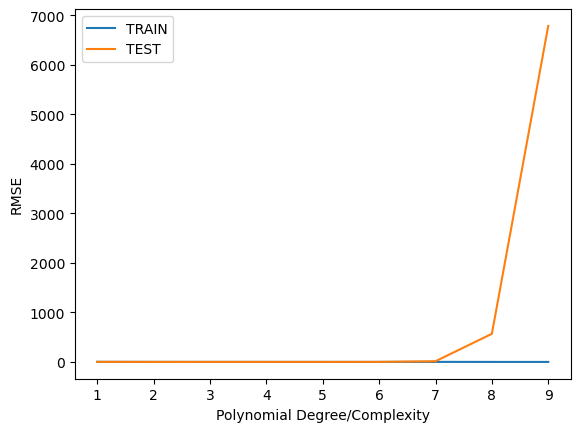

In [33]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10), test_rmse_errors, label='TEST')
plt.xlabel('Polynomial Degree/Complexity')
plt.ylabel('RMSE')
plt.legend()
plt.show()

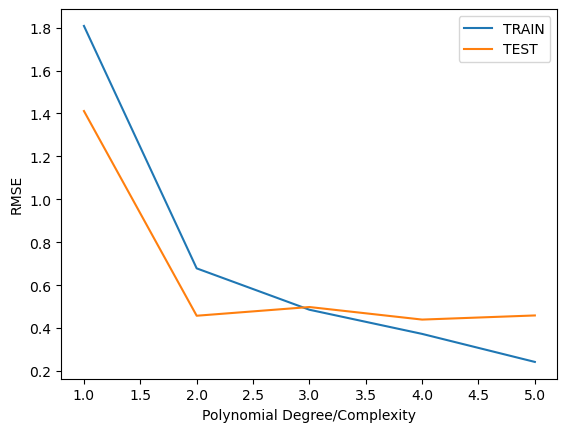

In [34]:
plt.plot(range(1,6),train_rmse_errors[0:5],label='TRAIN')
plt.plot(range(1,6), test_rmse_errors[0:5], label='TEST')
plt.xlabel('Polynomial Degree/Complexity')
plt.ylabel('RMSE')
plt.legend()
plt.show()

###### Final Model Choice

In [35]:
final_poly_conv = PolynomialFeatures(degree=3, include_bias=False)
final_poly_feat = final_poly_conv.fit_transform(X)

In [36]:
final_poly_model = LinearRegression()

In [37]:
final_poly_model.fit(final_poly_feat,y)

LinearRegression()

###### Saving a Model

In [38]:
from joblib import dump, load

In [39]:
dump(final_poly_model, 'sales_poly_model.joblib')

['sales_poly_model.joblib']

In [40]:
dump(final_poly_conv, 'sales_poly_converter.joblib')

['sales_poly_converter.joblib']

###### Deployment of Model and its Predictions 

In [41]:
loaded_conv = load('sales_poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

In [42]:
campaign = [[149,21,12],[123,32,98]]

In [43]:
campaign_poly = loaded_conv.transform(campaign)

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [44]:
loaded_model.predict(campaign_poly)

array([14.43945373, 15.06356426])